#Natural Language Processing

In [5]:
# Importing necessary modules from the nltk library for text processing and part-of-speech tagging.
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser

# Downloading necessary datasets for tokenization and part-of-speech tagging from NLTK.
# 'punkt' is a tokenizer that helps break text into individual words or sentences.
nltk.download('punkt')

# 'averaged_perceptron_tagger' is a pre-trained model used for part-of-speech tagging (assigning word categories such as noun, verb, etc.)
nltk.download('averaged_perceptron_tagger')

# 'stopwords' is a list of common words (like 'the', 'is', etc.) that are often removed from text during natural language processing tasks.
nltk.download('stopwords')

# 'punkt_tab' is a tokenization model that works specifically for certain edge cases (may not be commonly required).
nltk.download('punkt_tab')

# 'averaged_perceptron_tagger_eng' is another part-of-speech tagging model, potentially used for specific language or task adjustments.
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## 1. Chunking
Chunking is the process of grouping words into meaningful chunks (e.g., noun phrases).

In [31]:
# Importing the necessary functions from NLTK library for text processing and chunking.
from nltk import word_tokenize, pos_tag, RegexpParser

# Defining a sample text that contains all letters of the alphabet (pangram).
text = "The quick brown fox jumps over the lazy dog."

# Tokenizing the input text into individual words (tokens) using NLTK's word_tokenize function.
# This function splits the text into a list of words, punctuation marks are also treated as separate tokens.
tokens = word_tokenize(text)

# Tagging each token (word) with its part-of-speech (POS) using NLTK's pos_tag function.
# It assigns a grammatical tag to each word, such as DT for determiner, NN for noun, etc.
pos_tags = pos_tag(tokens)

# Defining a grammar for noun phrase (NP) chunking using regular expressions.
# This grammar captures noun phrases that start with an optional determiner (DT),
# followed by zero or more adjectives (JJ), and ending with a noun (NN).
grammar = "NP: {<DT>?<JJ>*<NN>}"

# Creating a chunk parser using NLTK's RegexpParser with the defined grammar.
# This parser will identify and group the tokens matching the noun phrase (NP) pattern.
chunk_parser = RegexpParser(grammar)

# Parsing the part-of-speech tagged tokens to identify and extract noun phrases based on the defined grammar.
tree = chunk_parser.parse(pos_tags)

# The result is a syntactic tree where noun phrases are grouped together.
# The tree structure represents the hierarchical structure of the sentence.


In [9]:
tree.pretty_print()

                                S                                          
     ___________________________|_______________________________            
    |        |     |            NP               NP             NP         
    |        |     |     _______|________        |       _______|______     
jumps/VBZ over/IN ./. The/DT quick/JJ brown/NN fox/NN the/DT lazy/JJ dog/NN



# Parsing




In [32]:
# Importing the spaCy library, which is used for natural language processing (NLP).
import spacy

# Loading the pre-trained English language model 'en_core_web_sm' for tokenization, part-of-speech tagging, dependency parsing, etc.
nlp = spacy.load('en_core_web_sm')

# Processing the sentence using the spaCy pipeline (which includes tokenization, POS tagging, and dependency parsing).
doc = nlp("The quick brown fox jumps over the lazy dog.")

# Iterating through each token (word) in the processed document (doc) and printing:
# - token.text: The actual word (token)
# - token.dep_: The syntactic dependency relation to the token's head
# - token.head.text: The word that the token is syntactically dependent on (its syntactic "head")
for token in doc:
    print(token.text, token.dep_, token.head.text)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


The det fox
quick amod fox
brown amod fox
fox nsubj jumps
jumps ROOT jumps
over prep jumps
the det dog
lazy amod dog
dog pobj over
. punct jumps


# Stemming


In [33]:
# Importing the PorterStemmer class from NLTK's stem module.
from nltk.stem import PorterStemmer

# Creating an instance of the PorterStemmer class.
stemmer = PorterStemmer()

# A list of words to be stemmed (reduced to their root form).
words = ["running", "runner", "runs", "ran"]

# Using a list comprehension to apply the stemmer to each word in the list and store the resulting stems in a new list.
stems = [stemmer.stem(word) for word in words]

# Printing the list of stemmed words (roots).
print(stems)


['run', 'runner', 'run', 'ran']


In [34]:
# Importing necessary libraries.
# 're' is for regular expressions, used for text preprocessing.
# 'PorterStemmer' is used for stemming words to their root form.
# 'word_tokenize' is used for tokenizing the text into individual words.
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Sample text that contains contractions (e.g., "He's" and "can't").
text = "He's running and can't stop. The dog's tail is wagging."

# Preprocessing: Handling contractions (optional)
# This step is used to handle contractions and apostrophes in the text using regular expressions (regex).

# Step 1: Replace fancy apostrophes (like curly quotes) with a standard apostrophe.
text_clean = re.sub(r"’", "'", text)  # Replaces '’' with standard "'"

# Step 2: Handle contractions like "can't" and "won't", by removing the apostrophe.
# This replaces "can't" with "cant" and "won't" with "wont".
text_clean = re.sub(r"\b(can't|won't)\b", lambda x: x.group(0).replace("'", ""), text_clean)

# Step 3: Remove any remaining apostrophes attached to words (e.g., "'s" as in "dog's").
text_clean = re.sub(r"'\b", "", text_clean)  # Removes apostrophes at the end of words.

# Tokenization: Split the cleaned text into individual words.
words = word_tokenize(text_clean)

# Apply stemming: Use PorterStemmer to reduce each word to its root form.
# For example, "running" becomes "run", "dog's" becomes "dog", etc.
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

# Print the original list of words (tokens) and the list of stemmed words.
print("Original Words:", words)
print("Stemmed Words:", stemmed_words)


Original Words: ['Hes', 'running', 'and', 'cant', 'stop', '.', 'The', 'dogs', 'tail', 'is', 'wagging', '.']
Stemmed Words: ['he', 'run', 'and', 'cant', 'stop', '.', 'the', 'dog', 'tail', 'is', 'wag', '.']


In [35]:
# Importing the necessary stemmers from NLTK library.
# PorterStemmer is a basic stemmer with a set of predefined rules for stemming.
# SnowballStemmer is a more aggressive stemmer, providing better results for various languages, including English.
from nltk.stem import PorterStemmer, SnowballStemmer

# Creating instances of the PorterStemmer and SnowballStemmer for English language.
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("english")   # Specify 'english' as the language for SnowballStemmer.

# List of words to be stemmed.
words = ["running", "try", "easily", "fairly", "nationalization", "studying"]

# Applying the PorterStemmer to each word in the list and storing the results.
porter_stemmed = [porter_stemmer.stem(word) for word in words]

# Applying the SnowballStemmer to each word in the list and storing the results.
snowball_stemmed = [snowball_stemmer.stem(word) for word in words]

# Printing the original words, Porter stemmed words, and Snowball stemmed words.
print("Original Words:  ", words)
print("PorterStemmed:    ", porter_stemmed)
print("SnowballStemmed:  ", snowball_stemmed)

Original Words:   ['running', 'try', 'easily', 'fairly', 'nationalization', 'studying']
PorterStemmed:     ['run', 'tri', 'easili', 'fairli', 'nation', 'studi']
SnowballStemmed:   ['run', 'tri', 'easili', 'fair', 'nation', 'studi']


# Lemmatization


In [36]:
# Importing spaCy and loading the English language model (small version).
import spacy

# Loading the small English model ('en_core_web_sm') for NLP processing.
nlp = spacy.load('en_core_web_sm')

# Sample text that contains different forms of words (good, well, better, best, go, gone, went).
doc = nlp("good well better best go gone went")

# Using a list comprehension to extract the lemmatized form of each token (word).
# The 'lemma_' attribute provides the base or root form of the word (e.g., "went" -> "go").
lemmas = [token.lemma_ for token in doc]

# Printing the list of lemmatized words.
print(lemmas)

['good', 'well', 'well', 'good', 'go', 'go', 'go']


# Tokenization


In [37]:
# Importing the necessary tokenization functions from NLTK.
# word_tokenize is used to split text into individual words.
# sent_tokenize is used to split text into sentences.
from nltk.tokenize import word_tokenize, sent_tokenize

# Sample text for tokenization.
text = "The quick brown fox. It jumps over the lazy dog."

# Tokenizing the text into individual words using word_tokenize.
# This splits the text into a list of words and punctuation marks.
word_tokens = word_tokenize(text)

# Tokenizing the text into sentences using sent_tokenize.
# This splits the text into a list of sentences.
sent_tokens = sent_tokenize(text)

# Printing the list of word tokens (words and punctuation).
print(word_tokens)

# Printing the list of sentence tokens (complete sentences).
print(sent_tokens)

['The', 'quick', 'brown', 'fox', '.', 'It', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
['The quick brown fox.', 'It jumps over the lazy dog.']


## 6. Stopword Removal
Stopword removal eliminates common words like "the", "is", etc.

In [38]:
# Importing necessary functions from NLTK.
# stopwords: A module that provides a list of common stopwords for various languages.
# word_tokenize: A function to split text into individual words.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Getting the list of English stopwords from NLTK's stopwords corpus.
stop_words = set(stopwords.words('english'))

# Sample text for processing.
text = "The quick brown fox jumps over the lazy dog."

# Tokenizing the text into words using word_tokenize.
words = word_tokenize(text)

# Filtering out stopwords from the tokenized words.
# We check if each word (converted to lowercase) is in the stopwords list.
filtered_words = [word for word in words if word.lower() not in stop_words]

# Printing the filtered list of words, with stopwords removed.
print(filtered_words)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']


# Lowercasing


In [39]:
# Sample text to be converted to lowercase.
text = "The Quick Brown Fox Jumps Over the LAZY Dog."

# Using the lower() method to convert all characters in the text to lowercase.
lower_text = text.lower()

# Printing the converted text in lowercase.
print(lower_text)

the quick brown fox jumps over the lazy dog.


# POS Tagging


In [40]:
# Importing necessary functions from NLTK.
# word_tokenize is used to split the text into individual words.
# pos_tag is used to assign part-of-speech tags to each token (word).
from nltk import word_tokenize, pos_tag

# Sample text for tokenization and POS tagging.
text = "The quick brown fox jumps over the lazy dog."

# Tokenizing the text into individual words using word_tokenize.
# This function splits the input text into a list of words and punctuation.
tokens = word_tokenize(text)

# Assigning part-of-speech tags to each token (word) using pos_tag.
# The pos_tag function assigns a grammatical category to each word (e.g., noun, verb, adjective).
pos_tags = pos_tag(tokens)

# Printing the list of tokens along with their POS tags.
print(pos_tags)

[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


# N-gram Extraction


In [41]:
# Importing the ngrams function from NLTK to generate n-grams (in this case, trigrams).
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Sample text for generating trigrams.
text = "The quick brown fox jumps over the lazy dog"

# Tokenizing the text into individual words using word_tokenize.
tokens = word_tokenize(text)

# Generating trigrams from the list of tokens.
# ngrams(tokens, 3) generates all possible contiguous sequences of 3 words (trigrams) from the tokens list.
trigrams = list(ngrams(tokens, 3))

# Printing the list of trigrams.
print(trigrams)

[('The', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog')]


# TF-IDF

In [42]:
# Importing the TfidfVectorizer from scikit-learn to convert text documents to TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# List of sample documents for TF-IDF vectorization.
documents = ["The quick brown fox jumps", "The lazy dog lies down"]

# Initializing the TfidfVectorizer. This will be used to transform the text into numerical representations.
vectorizer = TfidfVectorizer()

# Applying fit_transform to the documents. This both fits the vectorizer to the data and transforms the documents into TF-IDF vectors.
# The result is a sparse matrix where each row represents a document and each column represents a word from the vocabulary.
tfidf_matrix = vectorizer.fit_transform(documents)

# Converting the sparse matrix to a dense numpy array for easier viewing.
print(tfidf_matrix.toarray())

[[0.47107781 0.         0.         0.47107781 0.47107781 0.
  0.         0.47107781 0.33517574]
 [0.         0.47107781 0.47107781 0.         0.         0.47107781
  0.47107781 0.         0.33517574]]


# Bag of Words

In [43]:
# Importing the CountVectorizer from scikit-learn to convert text documents into a bag of words (BoW) model.
from sklearn.feature_extraction.text import CountVectorizer

# List of sample documents for bag-of-words vectorization.
documents = [
    "The quick brown fox jumps over the tree",
    "The lazy dog lies down over the ground and the cat is standing beside the tree"
]

# Initializing the CountVectorizer. This will be used to convert text into a BoW representation.
vectorizer = CountVectorizer()

# Applying fit_transform to the documents. This fits the vectorizer to the data and transforms the documents into a matrix of token counts.
# The result is a sparse matrix where each row represents a document and each column represents a word in the vocabulary.
bow_matrix = vectorizer.fit_transform(documents)

# Converting the sparse matrix to a dense numpy array for easier viewing.
print(bow_matrix.toarray())

[[0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 2 1]
 [1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 4 1]]


# Named Entity Recognition


In [44]:
# Load the pre-trained English model from spaCy. This model contains knowledge about common entities in English texts.
nlp = spacy.load('en_core_web_sm')

# Process the given text with the spaCy pipeline.
doc = nlp("Apple is looking at buying U.K. startup for $1 billion. Steve Jobs was eating an apple.")

# Loop through the identified entities in the processed document.
for ent in doc.ents:
    # Print the entity's text and its corresponding label (type of entity).
    print(ent.text, ent.label_)


Apple ORG
U.K. GPE
$1 billion MONEY
Steve Jobs PERSON


# Word Embedding (Word2Vec, GloVe)


In [45]:
# Importing necessary libraries
import gensim.downloader as api  # To load pre-trained word embeddings from Gensim's model hub
from numpy import dot  # For dot product computation, although not used in this code
from numpy.linalg import norm  # For vector normalization, also not used in this code

# Load pre-trained GloVe word embeddings (50-dimensional vectors)
model = api.load("glove-wiki-gigaword-50")

# Sample sentence to extract word embeddings for occurrences of 'bank'
sentence = 'king was in the near bank to swim in and then went to the bank to invest money. The bank was close'

# Tokenize the sentence into individual words by splitting on spaces
words = sentence.split()

# Initialize a list to store the embeddings for the word 'bank'
bank_vectors = []

# Loop through each word in the sentence
for word in words:
    # Check if the word is 'bank'
    if word == 'bank':
        # If the word 'bank' is in the model's vocabulary, append its vector to the list
        if word in model:
            bank_vectors.append(model[word])

# Print the list of embeddings (word vectors) for the word 'bank' in the sentence
print(bank_vectors)

[array([ 0.66488 , -0.11391 ,  0.67844 ,  0.17951 ,  0.6828  , -0.47787 ,
       -0.30761 ,  0.17489 , -0.70512 , -0.55022 ,  0.1514  ,  0.10214 ,
       -0.45063 , -0.33069 ,  0.056133,  1.2271  ,  0.55607 , -0.68297 ,
        0.037364,  0.70266 ,  1.9093  , -0.61483 , -0.83329 , -0.3023  ,
       -1.1118  , -1.55    ,  0.2604  ,  0.22957 , -1.0375  , -0.31789 ,
        3.5091  , -0.25871 ,  1.0151  ,  0.65927 , -0.18231 , -0.75859 ,
       -0.30927 , -0.91678 ,  1.0633  , -0.66761 , -0.37464 , -0.29143 ,
        0.65606 , -0.44642 , -0.075495, -1.0552  , -0.60501 ,  0.73582 ,
        1.0139  , -0.27749 ], dtype=float32), array([ 0.66488 , -0.11391 ,  0.67844 ,  0.17951 ,  0.6828  , -0.47787 ,
       -0.30761 ,  0.17489 , -0.70512 , -0.55022 ,  0.1514  ,  0.10214 ,
       -0.45063 , -0.33069 ,  0.056133,  1.2271  ,  0.55607 , -0.68297 ,
        0.037364,  0.70266 ,  1.9093  , -0.61483 , -0.83329 , -0.3023  ,
       -1.1118  , -1.55    ,  0.2604  ,  0.22957 , -1.0375  , -0.31789 ,
    

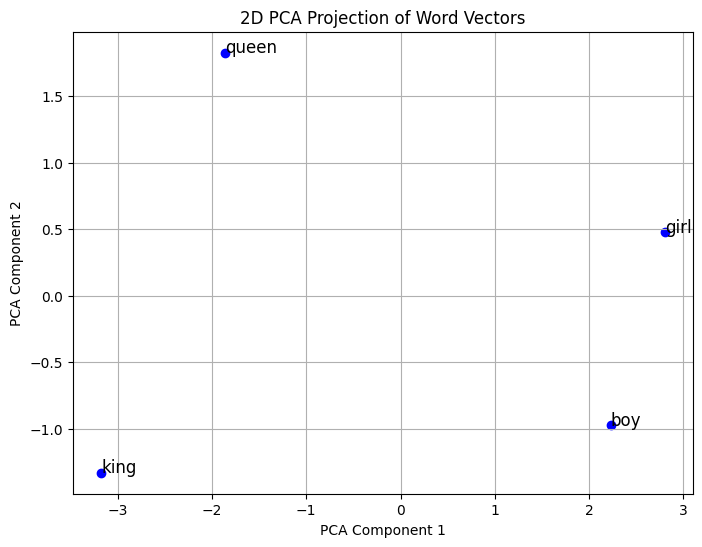

In [46]:
# Import necessary libraries
import gensim.downloader as api  # To load pre-trained word embeddings from Gensim's model hub
import matplotlib.pyplot as plt  # For creating visualizations (plots)
from sklearn.decomposition import PCA  # For dimensionality reduction (Principal Component Analysis)

# Load pre-trained GloVe word vectors (50-dimensional vectors) from Gensim's API
model = api.load("glove-wiki-gigaword-50")

# Define a list of words whose word embeddings we want to visualize
words = ["king", "queen", "girl", "boy"]

# Extract the word vectors (embeddings) for each word in the list
word_vectors = [model[word] for word in words]

# Perform PCA (Principal Component Analysis) for reducing the word vectors to 2D space
pca = PCA(n_components=2)  # We are reducing to 2 components (2D)
word_vectors_2d = pca.fit_transform(word_vectors)  # Apply PCA to the word vectors

# Create a plot to visualize the word vectors in the 2D space
plt.figure(figsize=(8, 6))  # Create a figure with specific size
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='blue')  # Plot the points in 2D space

# Annotate each point in the plot with its corresponding word
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

# Add title and axis labels
plt.title("2D PCA Projection of Word Vectors")  # Title of the plot
plt.xlabel("PCA Component 1")  # Label for the X-axis (First principal component)
plt.ylabel("PCA Component 2")  # Label for the Y-axis (Second principal component)

# Display grid on the plot for better readability
plt.grid(True)

# Show the plot
plt.show()

# Sentence Segmentation


In [48]:
# Importing the necessary function from NLTK to tokenize text into sentences
from nltk.tokenize import sent_tokenize

# Sample text that contains multiple sentences
text = "The quick brown fox jumps over the lazy dog. It then ran away."

# Tokenizing the text into individual sentences using the sent_tokenize function
sentences = sent_tokenize(text)

# Printing the list of tokenized sentences
print(sentences)

['The quick brown fox jumps over the lazy dog.', 'It then ran away.']


# Regex
### Phone Numbers (+dd-ddddddd)


In [49]:
# Sample text containing phone numbers
text = "Here are two phone numbers: +12-345678923 and +44-1234567."

# Regular expression pattern to match phone numbers in the format +dd-ddddddd
phone_pattern = r"\+\d{2}-\d{7,}"

# Use re.findall to find all matches of the pattern in the text
phone_numbers = re.findall(phone_pattern, text)

# Print the list of matched phone numbers
print(phone_numbers)

['+12-345678923', '+44-1234567']


### Email Addresses

In [51]:
# Regular expression pattern to match email addresses
email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"

# Sample text containing email addresses
text = "Please contact us at info@example.com or support@company.org or MHE@info.nl"

# Use re.findall to find all email matches in the text
email_addresses = re.findall(email_pattern, text)

# Print the list of found email addresses
print(email_addresses)

['info@example.com', 'support@company.org', 'MHE@info.nl']


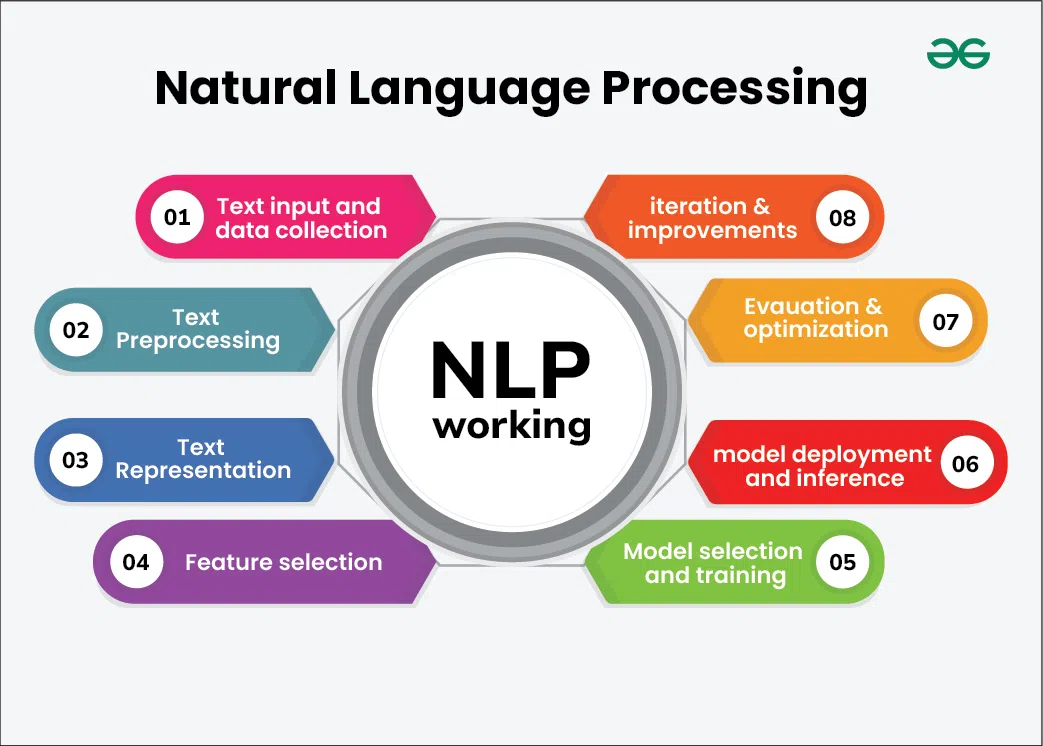

## **END**

---

